1. insurance.csv
Used for: 
- Descriptive Statistics (Percentiles, IQR)
- CLT Demonstration
- Hypothesis Testing (Smoker vs Non-Smoker)
- Linear Regression (Charges Prediction)
- A/B Testing
- Correlation and Pair Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
readmissions_df=pd.read_csv("hospital_readmissions.csv")
insurance_df=pd.read_csv("insurance.csv")
heart_csv=pd.read_csv("heart_disease_uci.csv")

In [3]:
readmissions_df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
readmissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
readmissions_df.dtypes
readmissions_df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [7]:
readmissions_df.shape

(25000, 17)

In [9]:
readmissions_df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [10]:
readmissions_df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [12]:
readmissions_df.duplicated().sum()

0

In [13]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
insurance_df.shape

(1338, 7)

In [19]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
insurance_df.duplicated().sum()

1

In [24]:
insurance_df[insurance_df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [27]:
insurance_df.drop_duplicates(keep='last')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
insurance_df.duplicated().sum()

1

In [29]:
insurance_df[insurance_df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [30]:
insurance1_df = insurance_df.drop_duplicates()

In [31]:
insurance1_df.duplicated().sum()

0

PERCENTILES AND IQR

In [35]:
import numpy as np
Q1 = np.percentile(insurance1_df['charges'], 25)
Q3 = np.percentile(insurance1_df['charges'], 75)

IQR = Q3 - Q1
print("25th percentile (Q1):", Q1)
print("75th percentile (Q3):", Q3)
print("Interquartile Range (IQR):", IQR)

# Detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = insurance1_df[(insurance_df['charges'] < lower_bound) | (insurance1_df['charges'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

25th percentile (Q1): 4746.344
75th percentile (Q3): 16657.71745
Interquartile Range (IQR): 11911.37345
Number of outliers: 139


C:\Users\samee\AppData\Local\Temp\ipykernel_14004\501522244.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = insurance1_df[(insurance_df['charges'] < lower_bound) | (insurance1_df['charges'] > upper_bound)]


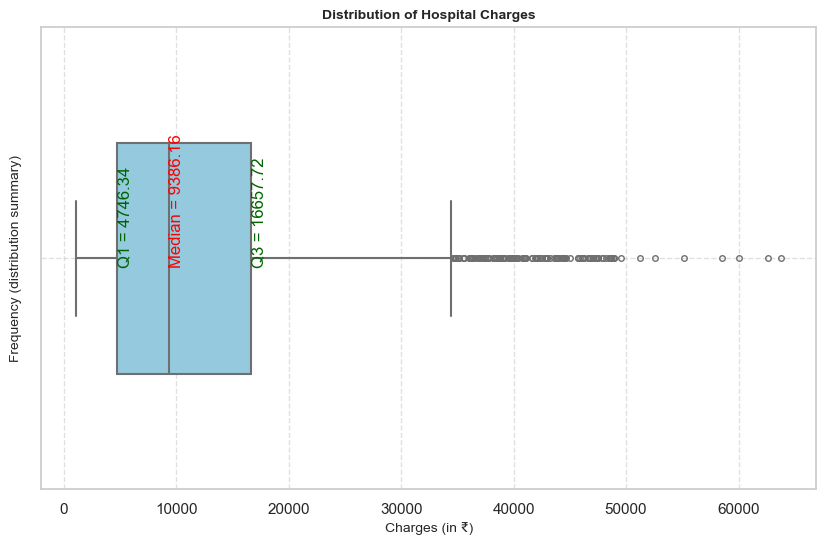

📊 Detailed Summary Statistics for 'charges':
25th Percentile (Q1): 4746.3440
75th Percentile (Q3): 16657.7175
Interquartile Range (IQR): 11911.3734
Lower Bound (Q1 - 1.5*IQR): -13120.7162
Upper Bound (Q3 + 1.5*IQR): 34524.7776
Median (50th Percentile): 9386.1613
Number of Outliers: 139


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall style and figure size
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(
    x=insurance1_df['charges'],
    color='skyblue',
    fliersize=4,      # size of outlier points
    linewidth=1.5,    # border thickness
    width=0.5
)

# Add descriptive labels and title
plt.title('Distribution of Hospital Charges', fontsize=10, fontweight='bold')
plt.xlabel('Charges (in ₹)', fontsize=10)
plt.ylabel('Frequency (distribution summary)', fontsize=10)

# Add gridlines for clarity
plt.grid(True, linestyle='--', alpha=0.6)

# Add text annotations for key stats
Q1 = insurance1_df['charges'].quantile(0.25)
Q3 = insurance1_df['charges'].quantile(0.75)
IQR = Q3 - Q1
median = insurance1_df['charges'].median()

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = insurance1_df[(insurance1_df['charges'] < lower_bound) | (insurance1_df['charges'] > upper_bound)]

plt.text(Q1, 0.02, f'Q1 = {Q1:.2f}', rotation=90, va='bottom', color='darkgreen')
plt.text(Q3, 0.02, f'Q3 = {Q3:.2f}', rotation=90, va='bottom', color='darkgreen')
plt.text(median, 0.02, f'Median = {median:.2f}', rotation=90, va='bottom', color='red')

# Show the plot
plt.show()

# Print detailed measures
print("📊 Detailed Summary Statistics for 'charges':")
print(f"25th Percentile (Q1): {Q1:.4f}")
print(f"75th Percentile (Q3): {Q3:.4f}")
print(f"Interquartile Range (IQR): {IQR:.4f}")
print(f"Lower Bound (Q1 - 1.5*IQR): {lower_bound:.4f}")
print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.4f}")
print(f"Median (50th Percentile): {median:.4f}")
print(f"Number of Outliers: {outliers.shape[0]}")

VISUALIZING CATEGORICAL DATA

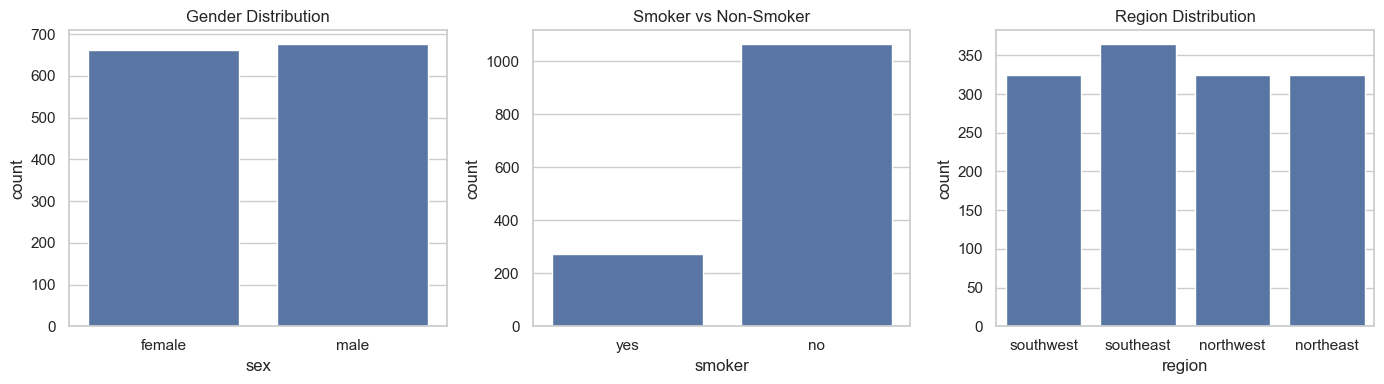

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.countplot(x='sex', data=insurance1_df)
plt.title('Gender Distribution')

plt.subplot(1,3,2)
sns.countplot(x='smoker', data=insurance1_df)
plt.title('Smoker vs Non-Smoker')

plt.subplot(1,3,3)
sns.countplot(x='region', data=insurance1_df)
plt.title('Region Distribution')
plt.tight_layout()
plt.show()


CENTRAL LIMIT THEOREM

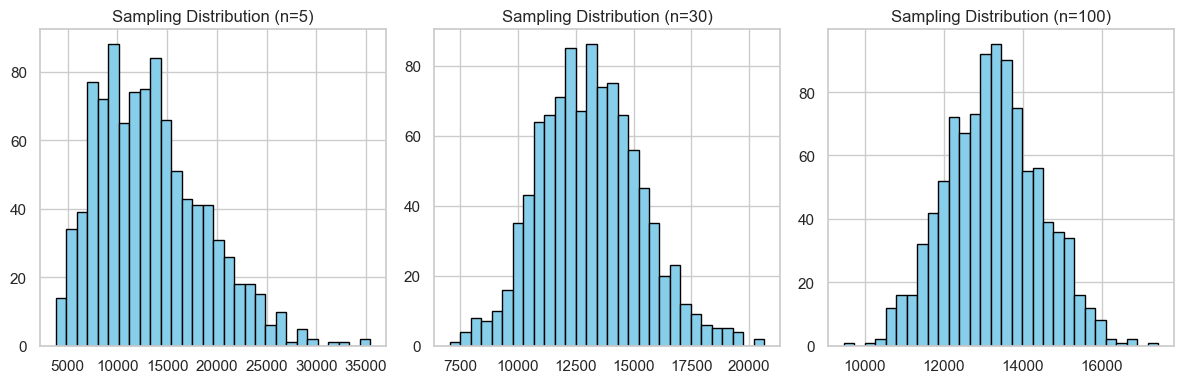

In [43]:
import numpy as np
import matplotlib.pyplot as plt

pop = insurance1_df['charges'].values

def sample_means(n, reps=1000):
    return [np.mean(np.random.choice(pop, n)) for _ in range(reps)]

plt.figure(figsize=(12,4))
for i, n in enumerate([5, 30, 100], 1):
    means = sample_means(n)
    plt.subplot(1,3,i)
    plt.hist(means, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Sampling Distribution (n={n})")
plt.tight_layout()
plt.show()

HYPOTHESIS TESTING

In [44]:
from scipy import stats

smoker = insurance1_df[insurance1_df['smoker'] == 'yes']['charges']
nonsmoker = insurance1_df[insurance1_df['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(smoker, nonsmoker, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")


t-statistic: 32.742, p-value: 6.262e-103


TWO SAMPLE T TEST

In [45]:
r1 = insurance1_df[insurance1_df['region']=='southeast']['charges']
r2 = insurance1_df[insurance1_df['region']=='southwest']['charges']

t, p = stats.ttest_ind(r1, r2, equal_var=False)
print(f"t-statistic: {t:.3f}, p-value: {p:.3f}")

t-statistic: 2.454, p-value: 0.014


A/B TESTING

In [47]:
def prop_test(count1, n1, count2, n2):
    p_pool = (count1 + count2) / (n1 + n2)
    se = np.sqrt(p_pool * (1-p_pool) * (1/n1 + 1/n2))
    z = (count1/n1 - count2/n2) / se
    p = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p

rA = insurance1_df[insurance1_df['region']=='southeast']
rB = insurance1_df[insurance1_df['region']=='southwest']
z, p = prop_test(rA['smoker'].eq('yes').sum(), len(rA),
                 rB['smoker'].eq('yes').sum(), len(rB))
print(f"z-score: {z:.3f}, p-value: {p:.3f}")


z-score: 2.277, p-value: 0.023


LINEAR REGRESSION

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = insurance1_df[['age','bmi','children','sex','smoker','region']]
X = pd.get_dummies(X, drop_first=True)
y = insurance1_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

pd.Series(lr.coef_, index=X.columns).sort_values()


R²: 0.8069287081198011
RMSE: 5956.342894363589


region_southeast     -838.919616
region_southwest     -659.139752
region_northwest     -391.761455
sex_male             -101.542054
age                   248.210720
bmi                   318.701441
children              533.009989
smoker_yes          23077.764593
dtype: float64

CORRELATION AND PAIR PLOTS

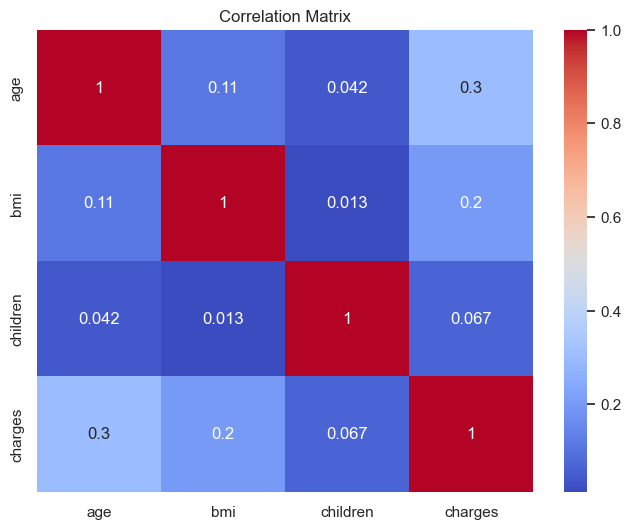

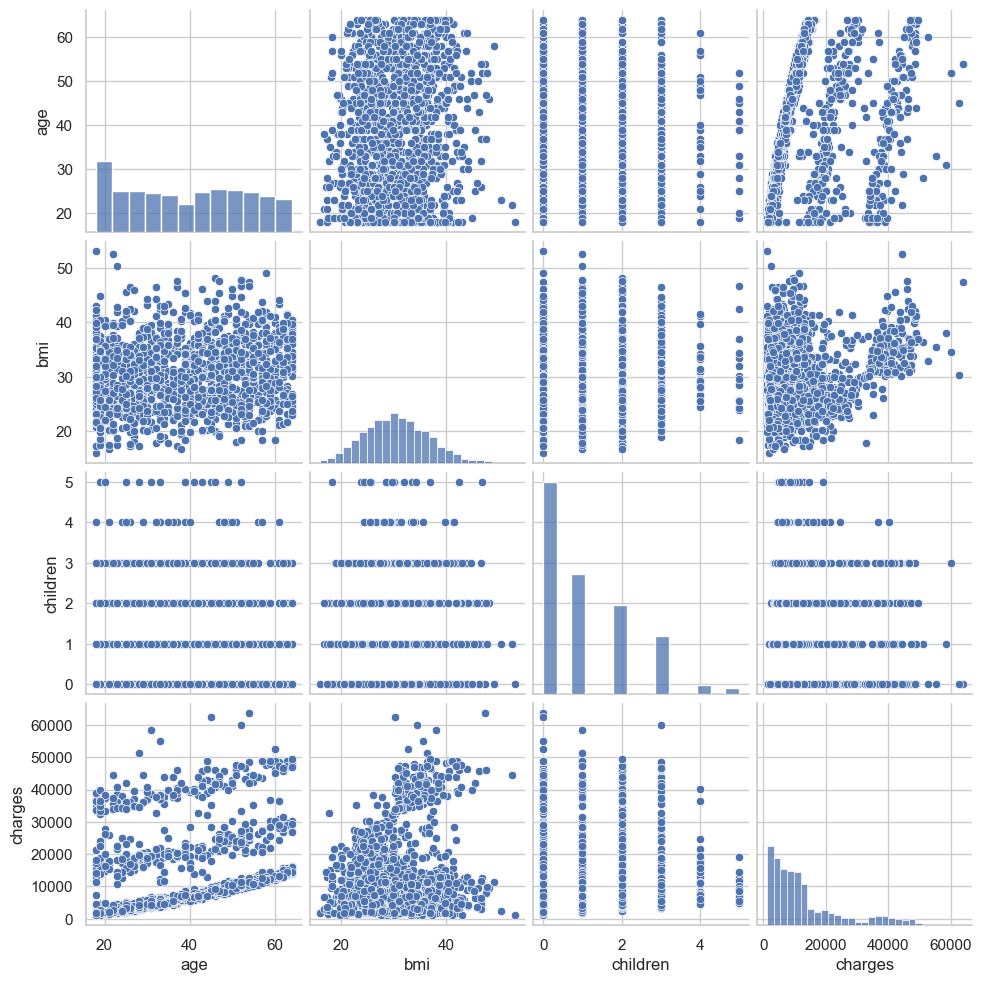

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

num = insurance1_df[['age', 'bmi', 'children', 'charges']]
corr = num.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(insurance1_df[['age','bmi','children','charges']])
plt.show()


In [50]:
import pandas as pd

# Load the dataset
readmit = pd.read_csv('hospital_readmissions.csv')

# Basic info
readmit.info()

# Preview first few rows
readmit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


DATA DISTRIBUTION

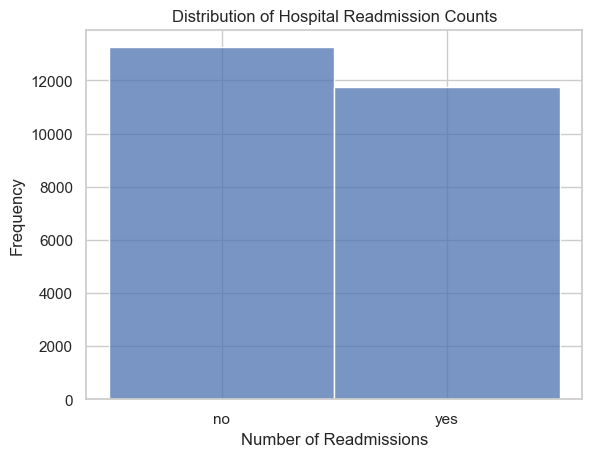

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(readmit['readmitted'], bins=20, kde=False)
plt.title('Distribution of Hospital Readmission Counts')
plt.xlabel('Number of Readmissions')
plt.ylabel('Frequency')
plt.show()


Two-sample test for count data

In [3]:
from scipy import stats
import numpy as np

# Convert readmitted to numeric counts
readmit['readmit_numeric'] = readmit['readmitted'].replace({
    'NO': 0, 'No': 0, 'no': 0,
    '>30': 1, '<30': 1, 
    'yes': 1, 'Yes': 1
})

# Create two medication groups
group_A = readmit.loc[readmit['n_medications'] <= 5, 'readmit_numeric']
group_B = readmit.loc[readmit['n_medications'] > 5, 'readmit_numeric']

# Calculate means
mean_A = group_A.mean()
mean_B = group_B.mean()

# Sample sizes
n_A = len(group_A)
n_B = len(group_B)

# Poisson rate variance approximation
var_A = mean_A / n_A
var_B = mean_B / n_B

# Z-test for Poisson rate difference
z = (mean_A - mean_B) / np.sqrt(var_A + var_B)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Mean readmissions (Low meds): {mean_A:.3f}")
print(f"Mean readmissions (High meds): {mean_B:.3f}")
print(f"Z-statistic: {z:.3f}")
print(f"P-value: {p_value:.4e}")



Mean readmissions (Low meds): 0.366
Mean readmissions (High meds): 0.475
Z-statistic: -5.640
P-value: 1.7004e-08


C:\Users\samee\AppData\Local\Temp\ipykernel_3112\2934688315.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  readmit['readmit_numeric'] = readmit['readmitted'].replace({


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset (CSV disguised as .xls)
df = pd.read_csv("hospital_readmissions.csv")

# ---------------------------
# 1️⃣ Select features & target
# ---------------------------
# Example: predict "time_in_hospital" based on others
X = df.drop("time_in_hospital", axis=1)
y = df["time_in_hospital"]

# ---------------------------
# 2️⃣ Identify numeric & categorical columns
# ---------------------------
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# ------------------------------------
# 3️⃣ Preprocessing: OneHot + passthrough
# ------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# ---------------------------
# 4️⃣ Build regression pipeline
# ---------------------------
model = Pipeline(steps=[
    ("preprocessor", preprocess),
    ("regressor", LinearRegression())
])

# ---------------------------
# 5️⃣ Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 6️⃣ Train the model
# ---------------------------
model.fit(X_train, y_train)

# ---------------------------
# 7️⃣ Evaluate
# ---------------------------
score = model.score(X_test, y_test)
print("R² Score:", score)

R² Score: 0.2984917793412549


In [3]:
data=pd.read_csv("insurance.csv")

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# ---------------- LOAD DATA ----------------
df = pd.read_csv("insurance.csv")

# Features and target
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# ---------------- TRAIN TEST SPLIT ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- PREPROCESSING ----------------
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# ---------------- TUNED RANDOM FOREST ----------------
rf = RandomForestRegressor(random_state=42)

rf_params = {
    "model__n_estimators": [200, 300],
    "model__max_depth": [8, 12, None],
    "model__min_samples_split": [2, 4],
}

rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', rf)
])

rf_grid = GridSearchCV(rf_pipeline, rf_params, scoring='r2', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
print("🔹 Tuned Random Forest R²:", r2_score(y_test, rf_pred))


🔹 Tuned Random Forest R²: 0.8709605474697832
